In [6]:
from scipy import integrate
import numpy as np

f = lambda y, x: x*y**2
integrate.nquad(f, [[1, np.inf],[0, np.inf]])

(-3180185.964921904, 8.617534893712027e+23)

<function matplotlib.pyplot.show(close=None, block=None)>

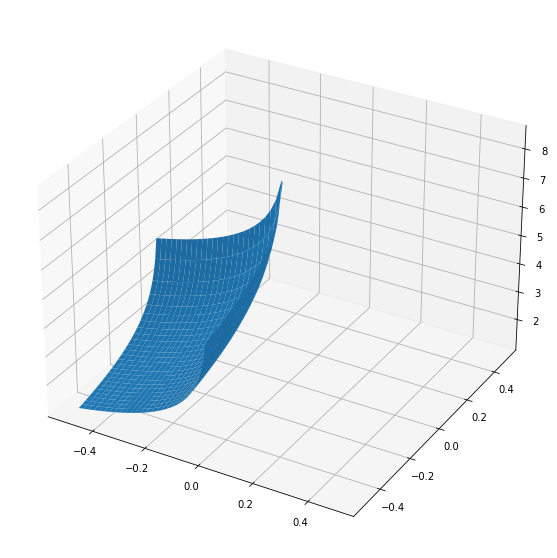

In [7]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline

arr_x = np.arange(-0.5,0.5,0.01)
arr_y = np.arange(-0.5,0.5,0.01)
X,Y = np.meshgrid(arr_x, arr_y)
Z = np.empty([arr_x.size, arr_y.size])
Z[:] = np.nan

#https://www.wolframalpha.com/input/?i=integral+%28e%5E%28-x*y%29%29+dxdy
f = lambda y, x: np.exp(-x*y)

def integrand(x, y):
    m = integrate.dblquad(f, -np.inf, x, lambda x: -np.inf, lambda x: y)
    return m[0]

for idx_x, x in enumerate(arr_x):
    if x < 0:
        for idx_y, y in enumerate(arr_y):
            if y < 0:
                val = integrand(x, y)
                Z[idx_x][idx_y] = np.nan if val < 0.1 else val

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.view_init(30, -60) #default is (30, -60)=(ax1.elev, ax1.azim)
#print([ax1.elev, ax1.azim])
surf1 = ax1.plot_surface(X, Y, Z)

plt.show

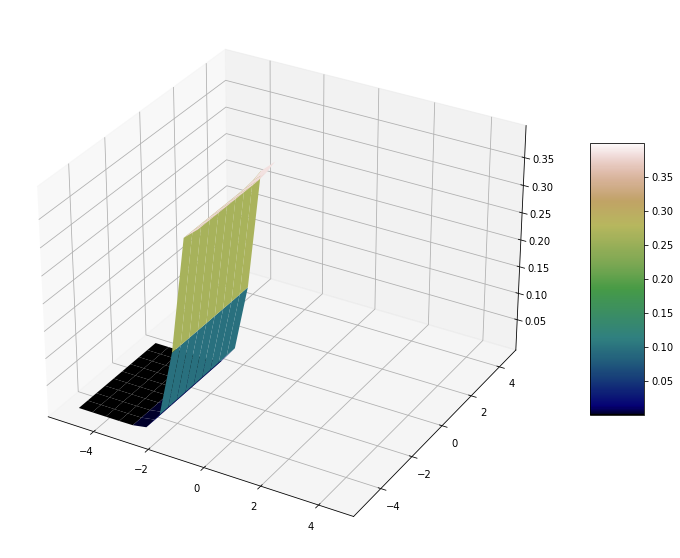

In [8]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline

arr_x = np.arange(-5,5,0.5)
arr_y = np.arange(-5,5,0.5)
X,Y = np.meshgrid(arr_x, arr_y)
Z = np.empty([arr_x.size, arr_y.size])
Z[:] = np.nan

#https://www.wolframalpha.com/input/?i=x*e%5E%28-x%5E2-y%5E2%29
#https://www.wolframalpha.com/input/?i=derivative+of+x*e%5E%28-x%5E2-y%5E2%29
def deriv_y(x,y):
    return x, 2*x*y*np.exp(-x**2-y**2)

def deriv_x(x,y):
    return (1-2*x**2)*np.exp(-x**2-y**2)

def chain(x,y):
    res_x, res_y = deriv_y(x,y)
    res_xx = deriv_x(res_x, res_y)
    return res_xx

def integrand(x, y):
    m = integrate.dblquad(chain, -np.inf, x, lambda x: -np.inf, lambda x: y)
    return m[0]

#need to be fixed as explained here at MSE:
#https://math.stackexchange.com/questions/4346710/how-to-integrate-pdes-back-to-the-original-function-e-g-x-e-x2-y2-gen
for idx_x, x in enumerate(arr_x):
    if x < 0:
        for idx_y, y in enumerate(arr_y):
            if y < 0:
                Z[idx_x][idx_y] = integrand(x, y)

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.view_init(30, -60) #default is (30, -60)=(ax1.elev, ax1.azim)
#print([ax1.elev, ax1.azim])
mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

plt.show()

In [9]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline

arr_x = np.arange(0.1,10.1,0.5)
arr_y = np.arange(-5,5,0.5)
X,Y = np.meshgrid(arr_x, arr_y)
Z = np.zeros([arr_x.size, arr_y.size])
I = 1j

for idx_a, a in enumerate(arr_x):
   for idx_b, b in enumerate(arr_y):
       f = lambda x, t: np.exp((-a*t**2+I*b*t)/(3*t**2+1)+I*t*x)*(x/(3*t**2+1))
       m = integrate.dblquad(f, 0, np.inf, lambda x: -np.inf, lambda x: np.inf)
       Z[idx_a][idx_b] = m[0]

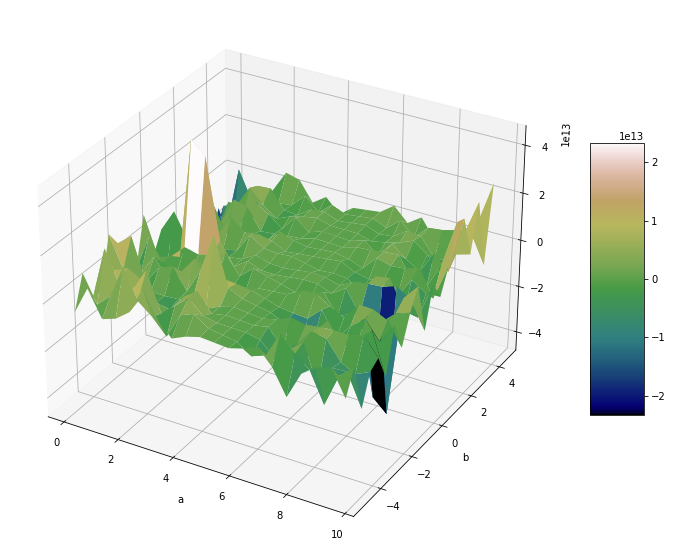

In [10]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111, projection='3d')
mycmap = plt.get_cmap('gist_earth')
ax1.set_xlabel('a')
ax1.set_ylabel('b')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

plt.show()